# Introduction
- buying : Buying Level or Capacity of the customer (Very High: vhigh, High: high, Low: low, Medium: med)
- maint  : Maintenence Level (Very High: vhigh, High: high, Low: low, Medium: med)
- doors  : Number of doors in the car (2, 3, 4, and 5 or more)
- persons : capacity in terms of persons to carry (2, 4, and more)
- lug_boot: The size of the Luggage Boot (small, med, big)
- safety: Safety Level of Car (high, med, low)
- class: Unacceptable, Acceptable, VeryGood, Good

- Steps 
  - Reading and understanding the data
  - Data Cleaning
  - Feature Engineering
  - Train-Test split
  - Model development
  - Prediction
  - Visualising decision tree
  - Conclusion

In [1]:
# import libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Reading and understanding the data

In [3]:
# import dataset
df = pd.read_csv('/Users/sakshimunde/Downloads/car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


- We can see that there are no proper column names in the dataset. We have to give proper names to the columns.

In [4]:
# Rename column names
df.columns = ['buying','maint','doors','persons','lug_boot','safety','class']


In [5]:
# dimension of the data set
df.shape

(1727, 7)

In [6]:
# lets look at the dataset
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Data Cleaning

In [7]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

- There are no null values.

In [8]:
# let's look at summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
# Let's look at the frequency distribution of values in variables
col = ['buying','maint','doors','persons','lug_boot','safety','class']
for c in col:
    print(df[c].value_counts())
    print('\n')

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64


high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64


3        432
4        432
5more    432
2        431
Name: doors, dtype: int64


4       576
more    576
2       575
Name: persons, dtype: int64


med      576
big      576
small    575
Name: lug_boot, dtype: int64


med     576
high    576
low     575
Name: safety, dtype: int64


unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64




- All the variables are of ordinal categorical type.
- Class is the target variable.

### Declare feature vector and target variable 

In [10]:
X = df.drop(['class'],axis=1)
y = df['class']

### Feature Engineering
- Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

In [11]:
# import category_encoders

from sklearn.preprocessing import OrdinalEncoder

In [12]:
# Encoding categorical variables. Encode variables with ordinal encoding

buying_price_category = ['low', 'med', 'high', 'vhigh']
maint_cost_category = ['low', 'med', 'high', 'vhigh']
doors_category = ['2', '3', '4', '5more']
person_capacity_category = ['2', '4', 'more']
lug_boot_category = ['small', 'med', 'big']
safety_category = ['low', 'med', 'high']


cat = [buying_price_category, maint_cost_category ,doors_category, person_capacity_category ,
       lug_boot_category, safety_category]
oe = OrdinalEncoder(categories = cat)
oe

OrdinalEncoder(categories=[['low', 'med', 'high', 'vhigh'],
                           ['low', 'med', 'high', 'vhigh'],
                           ['2', '3', '4', '5more'], ['2', '4', 'more'],
                           ['small', 'med', 'big'], ['low', 'med', 'high']])

In [13]:
X = oe.fit_transform( df[['buying','maint','doors','persons','lug_boot','safety']])

## Train-Test split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state = 100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1208, 6)
(1208,)
(519, 6)
(519,)


- We have train and test dataset ready for model building.
##  Model development 
##### Decision Tree Classifier with criterion Gini index 

In [15]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
# Instance/object of class DecsionTreeClassifier with criterion gini index
dt_gini = DecisionTreeClassifier(max_depth = 3, criterion = 'gini' ,min_samples_split = 10)

# fit the model
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

## Predicting train and test set 

In [17]:
y_train_pred = dt_gini.predict(X_train)
y_test_pred = dt_gini.predict(X_test)

##### Checking accuracy score of train and test dataset

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
# accuracy 
print('Training set :',accuracy_score(y_train, y_train_pred))
print('Test set :',accuracy_score(y_test, y_test_pred))

Training set : 0.7955298013245033
Test set : 0.7822736030828517


- Here y_train is the actual class label and y_train_pred is predicted class labels.
###### Checking for overfitting and uderfitting
- Here training-set accuracy score is 0.79 and test-set is 0.78. This two values are quite comparable. With this we can say there is no overfitting.
## Confusion Matrix
- A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. 

In [20]:
from sklearn.metrics import confusion_matrix

# confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[ 49,   0,  56,   0],
       [ 22,   0,   0,   0],
       [ 15,   0, 357,   0],
       [ 20,   0,   0,   0]])

### Visualise Decision trees

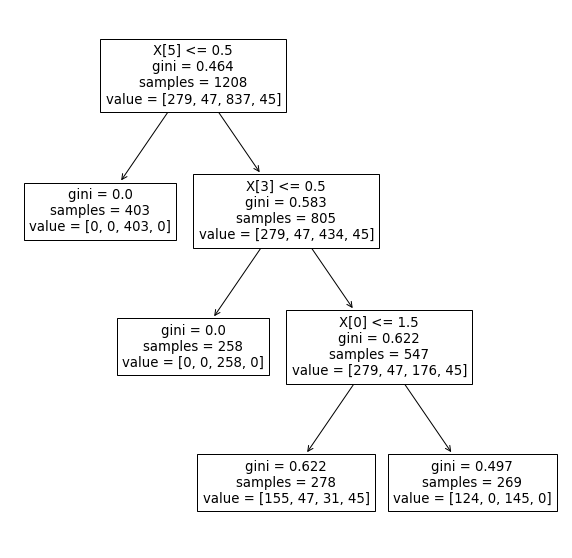

In [21]:
plt.figure(figsize= [10,10])
from sklearn import tree
tree.plot_tree(dt_gini)
plt.show()

### Visualise decision tree with graphviz

In [22]:
import graphviz

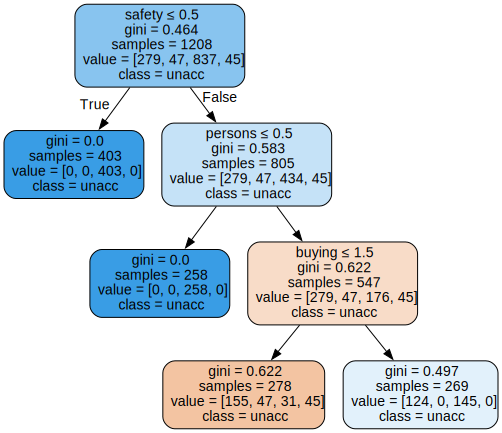

In [23]:
dot_data = tree.export_graphviz(dt_gini, out_file=None, class_names = y_train, feature_names = df.columns[:-1], 
                               filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph

- Gini index is a measure of the impurity of the node.

- The root node in the tree is based on "safety" feature. If safety is <= 0.5 then samples are classified as "unacc(unacceptable)". The decision tree shows that the safety feature has a strong imapct on the acceptance of a car. If the safety rating is below 0.5, then the car is likely to be unacceptable.

- The first split is based on the "persons" feature,which suggests that the number of persons that a car can accommodate is another important factor in determining whether a car is accepted or not. 

- The second split is based on 'buying' feature which suggests that the price range of a car is also an important factor in determining its acceptance.
- The decision tree also indicates that the majority of the cars in the dataset are labelled as 'unacc' with a value count of 1210 out of 1728 instances.

# Conclusion 
- If the safety is <= 0.5 , buying price <=1.5(low or med) and if the number of persons the car can hold is <= 0.5, then the car is likely to be unacceptable.
- If the above conditions are not met, then the car is likely to be acceptable.
